In [1]:
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from pandas_datareader import data as web
from functools import reduce
from tabulate import tabulate
from matplotlib.ticker import FormatStrFormatter

## Main purpose of the assignment

Investment/portfolio design and analysis
- Goal of project: Build a portfolio, return and risks evaluation. Estimate a model (CAPM / Multifactors models).
- Introduction: present the companies, assets, benchmarks,…selected.
- Present your data and the selected securities in your portfolio;
- Present your methodology and the materials/sofware used (Gretl, R, Phyton, …).
- Data analysis (risks, return, correlation, …)
- Evaluation of portfolio performance and conclusion.
- Annex: Detailed information about the data collected.


In this report we are going to make an analysis of the healthcare industry, specifically focusing on the pharmaceutical sector to observe how the current global pandemic shaped the evolution of the industry

- Exporting the data from yahoo finance

In [2]:
stocks = {'PFE':'PFIZER INC', 'AZN':'ASTRAZENECA', 'GSK':'GLAXOSMITHKLINE',  'SAN':'SANOFI', 'NVS':'NOVARTIS', 'JNJ':'JOHNSON & JOHNSON', 'BMY':'BRISTOL-MYERS',"ABBV": "ABBVIE INC"}
funds = {'IHE' : 'ISHARES US PHARMACEUTICALS', 'XBI' :  'SPDR S&P BIOTECH', 'PJP' :  'INVESCO DYNAMIC PHARMACEUTIC'}
commodoties = {'GC=F' : "Gold"}
currencies = {"EURUSD%3DX": "EUR/USD Spot Rate", "USDEUR%3DX": "USD/EUR Spot Rate"}
instruments = {**stocks, **funds, **commodoties, **currencies}
tickers = list(instruments.keys())
instruments_data = {}
N = len(tickers)
#index = {'^GSPC' : "S&P 500"}

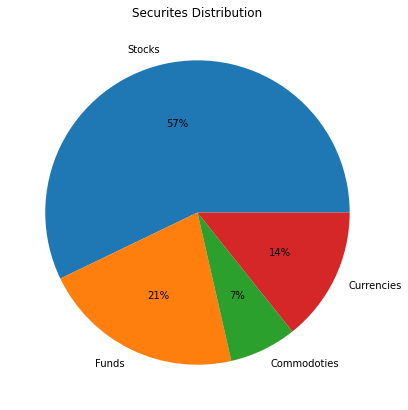

In [3]:
values = [8, 3, 1, 2]
labels = ["Stocks", "Funds", "Commodoties", "Currencies"]

plt.figure(figsize = (7,7))
plt.pie(values, labels = labels, autopct='%1.0f%%')

plt.title("Securites Distribution")
plt.show()

- We are going to consder data from the following periods

In [4]:
start = datetime.datetime(2015,1,1)
end   = datetime.datetime(2020,12,31)

- Getting instruments based on ticker

In [5]:
instruments_data = {}
for ticker, instrument in instruments.items():
    instruments_data[ticker] = web.DataReader(ticker, data_source = 'yahoo', start = start, end = end)

- Checking a specific security 

In [6]:
instruments_data["PFE"]

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2015-01-02,30.151802,29.620493,29.667933,29.724857,16371571.0,23.594526
2015-01-05,29.800758,29.421251,29.743834,29.563566,24786391.0,23.466497
2015-01-06,30.227703,29.525618,29.667933,29.810247,29468681.0,23.662304
2015-01-07,30.237192,29.962049,30.094877,30.218216,20248816.0,23.986134
2015-01-08,30.967743,30.569260,30.683111,30.834915,49169522.0,24.475653
...,...,...,...,...,...,...
2020-12-24,37.570000,37.180000,37.400002,37.270000,14790100.0,36.868916
2020-12-28,37.580002,36.680000,37.360001,36.820000,26993700.0,36.423756
2020-12-29,37.200001,36.790001,36.900002,37.049999,23152100.0,36.651279


- Keeping only the adjusted close price

In [7]:
for ticker, instrument in instruments.items():
  instruments_data[ticker] = instruments_data[ticker]["Adj Close"]

- Checking trading days

In [8]:
tr_days = [ len(instr) for _, instr in instruments_data.items() ] 
tr_days = pd.DataFrame(tr_days, index = tickers, columns = ["Trading Days"])
tr_days.T

,PFE,AZN,GSK,SAN,NVS,JNJ,BMY,ABBV,IHE,XBI,PJP,GC=F,EURUSD%3DX,USDEUR%3DX
Trading Days,1511,1511,1511,1511,1511,1511,1511,1511,1511,1511,1511,1498,1544,1544


In [9]:
## 2.4 - Merging Dataframes
data = list(instruments_data.values())
data_df = reduce(lambda x, y: pd.merge(x, y, left_index = True, right_index = True, how = 'outer'), data).dropna()
data_df.columns = tickers

In [10]:
data_df

,PFE,AZN,GSK,SAN,NVS,JNJ,BMY,ABBV,IHE,XBI,PJP,GC=F,EURUSD%3DX,USDEUR%3DX
Date,,,,,,,,,,,,,,
2015-01-02,23.594526,27.312208,29.982803,6.549814,64.720573,88.150795,50.372330,50.560047,139.506882,61.828777,60.398533,1186.000000,1.208941,0.827170
2015-01-05,23.466497,27.102711,29.657295,6.168649,64.860878,87.535149,49.585144,49.608547,138.588684,62.022408,60.008694,1203.900024,1.194643,0.837070
2015-01-06,23.662304,26.443186,29.494543,6.051967,64.313652,87.104996,49.500496,49.363003,137.799179,60.480045,59.655113,1219.300049,1.193902,0.837590
2015-01-07,23.986134,26.416025,29.798822,6.145313,64.594292,89.027946,50.143799,51.358082,140.773804,62.898598,61.033165,1210.599976,1.187536,0.842080
2015-01-08,24.475653,26.796225,30.563080,5.717474,66.839333,89.727943,51.396542,51.895229,143.261917,64.293297,62.329624,1208.400024,1.183600,0.844880
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-23,37.037083,47.845219,35.596581,3.150000,84.970360,150.998413,60.517281,102.086014,176.137253,151.098328,70.144875,1874.699951,1.218665,0.820570
2020-12-28,36.423756,48.443653,35.655533,3.140000,87.681564,152.240677,60.636330,102.254044,176.147217,146.419617,70.244682,1877.199951,1.220510,0.819330
2020-12-29,36.651279,48.953793,36.333466,3.120000,89.748619,153.184784,60.933956,103.489594,176.476013,142.130798,70.374435,1879.699951,1.222345,0.818100


- Ajudsted Close Evolution for each stock

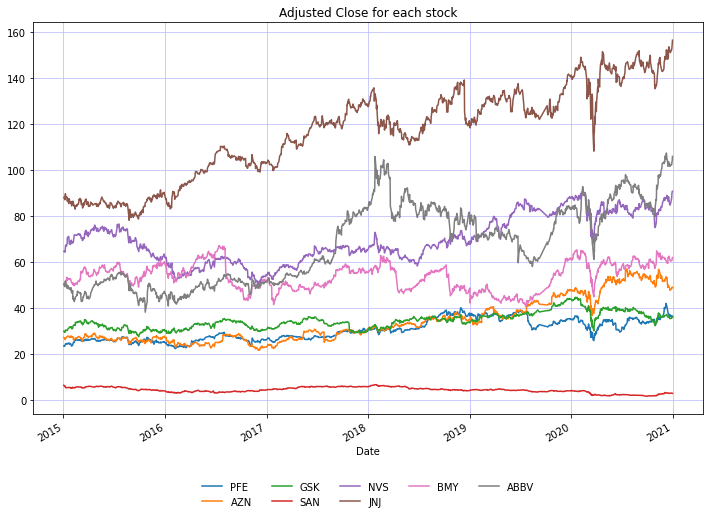

In [11]:
fig, ax = plt.subplots(figsize=(12,8))
data_df[["PFE","AZN","GSK","SAN","NVS","JNJ","BMY","ABBV"]].plot(ax = plt.gca(),grid = True)
ax.set_title('Adjusted Close for each stock')
ax.grid(c = (0.75, 0.75, 0.99))
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=5).get_frame().set_linewidth(0.0)

- Cummulative Returns for each stock

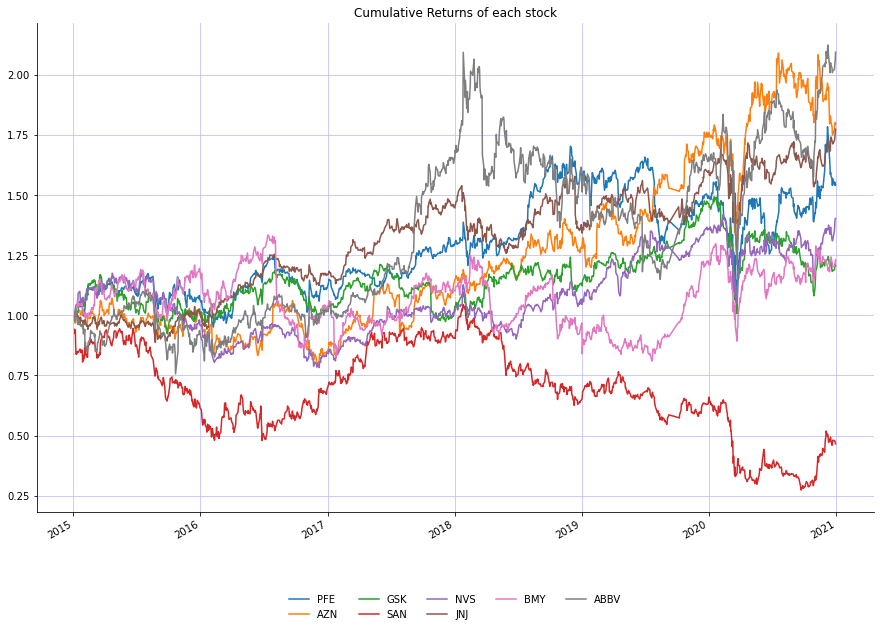

In [12]:
returns = data_df[["PFE","AZN","GSK","SAN","NVS","JNJ","BMY","ABBV"]] .apply(np.log).diff(1) 
cumulative_returns = returns.cumsum().apply(np.exp)
ax = cumulative_returns.plot(title='Cumulative Returns of each stock', figsize=(15,10));
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=5).get_frame().set_linewidth(0.0);
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlabel('')
ax.grid(c = (0.75, 0.75, 0.99))
plt.show()

- Adjusted Close Evolution for each fund

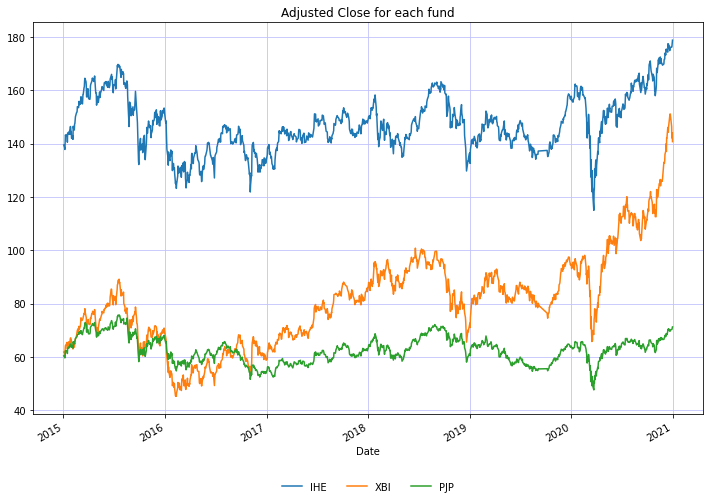

In [13]:
fig, ax = plt.subplots(figsize=(12,8))
data_df[["IHE","XBI","PJP"]].plot(ax = plt.gca(),grid = True)
ax.set_title('Adjusted Close for each fund')
ax.grid(c = (0.75, 0.75, 0.99))
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=5).get_frame().set_linewidth(0.0)

- Cummulative Returns for each fund

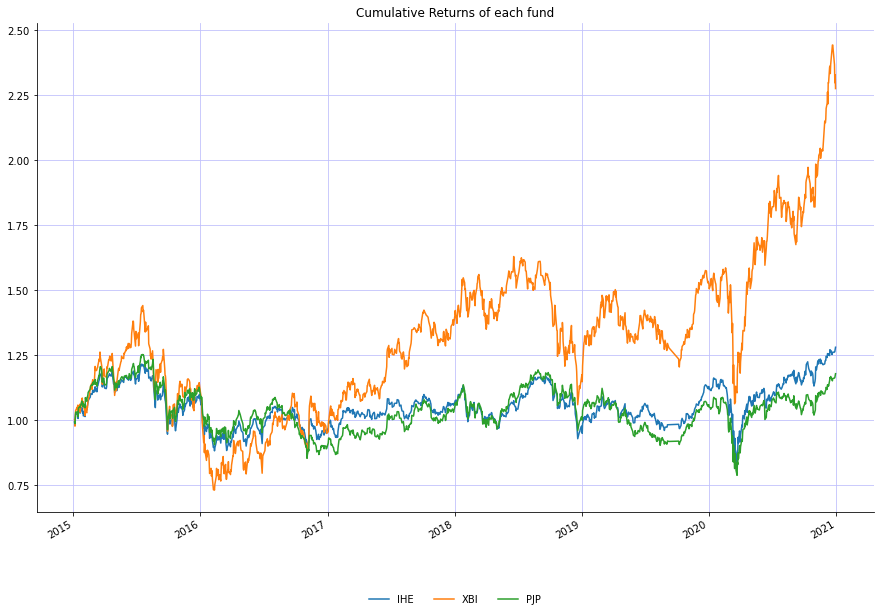

In [14]:
returns = data_df[["IHE","XBI","PJP"]] .apply(np.log).diff(1) 
cumulative_returns = returns.cumsum().apply(np.exp)
ax = cumulative_returns.plot(title='Cumulative Returns of each fund', figsize=(15,10));
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=5).get_frame().set_linewidth(0.0);
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlabel('')
ax.grid(c = (0.75, 0.75, 0.99))
plt.show()

- Adjusted Close Evolution for each commodity

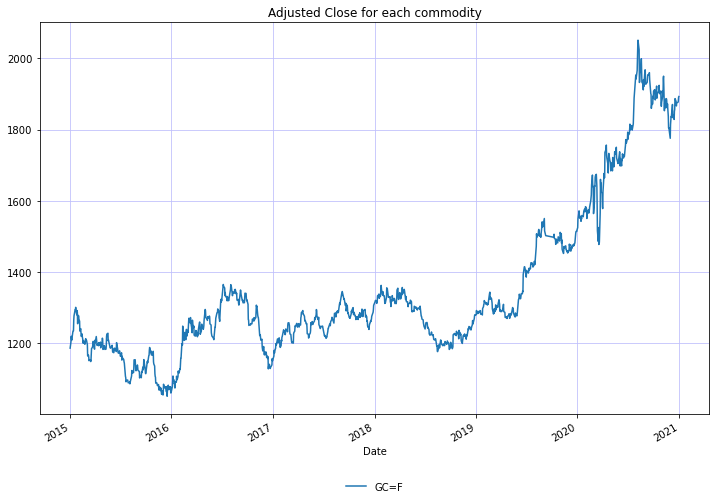

In [15]:
fig, ax = plt.subplots(figsize=(12,8))
data_df[["GC=F"]].plot(ax = plt.gca(),grid = True)
ax.set_title('Adjusted Close for each commodity')
ax.grid(c = (0.75, 0.75, 0.99))
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=5).get_frame().set_linewidth(0.0)

- Cummulative Returns for each commodity

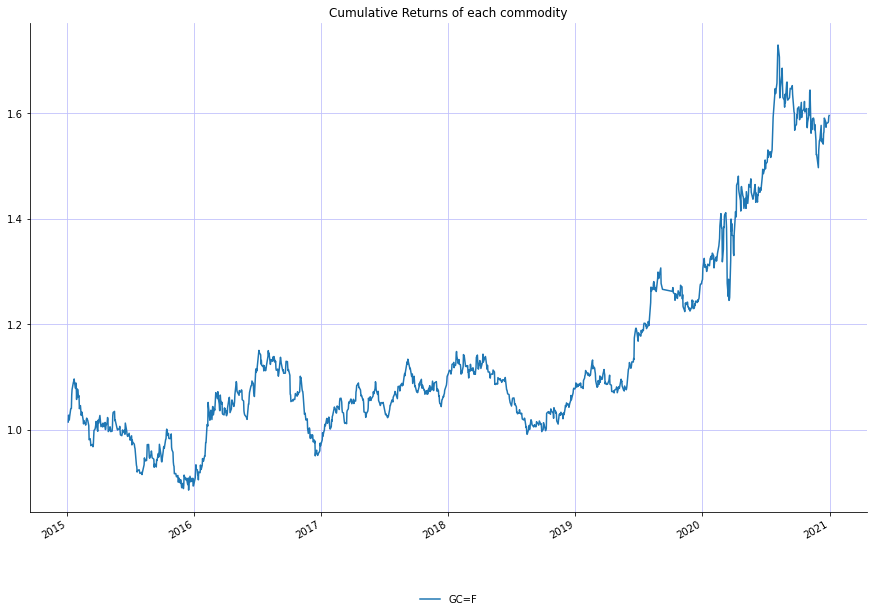

In [16]:
returns = data_df[["GC=F"]] .apply(np.log).diff(1) 
cumulative_returns = returns.cumsum().apply(np.exp)
ax = cumulative_returns.plot(title='Cumulative Returns of each commodity', figsize=(15,10));
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=5).get_frame().set_linewidth(0.0);
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlabel('')
ax.grid(c = (0.75, 0.75, 0.99))
plt.show()

- Adjusted Close Evolution for each currency

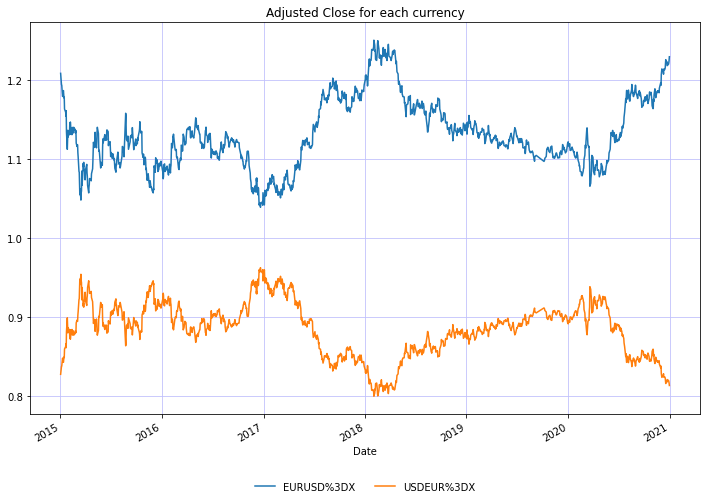

In [58]:
fig, ax = plt.subplots(figsize=(12,8))
data_df[["EURUSD%3DX","USDEUR%3DX"]].plot(ax = plt.gca(),grid = True)
ax.set_title('Adjusted Close for each currency')
ax.grid(c = (0.75, 0.75, 0.99))
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=5).get_frame().set_linewidth(0.0)

- Cummulative Returns for each currency

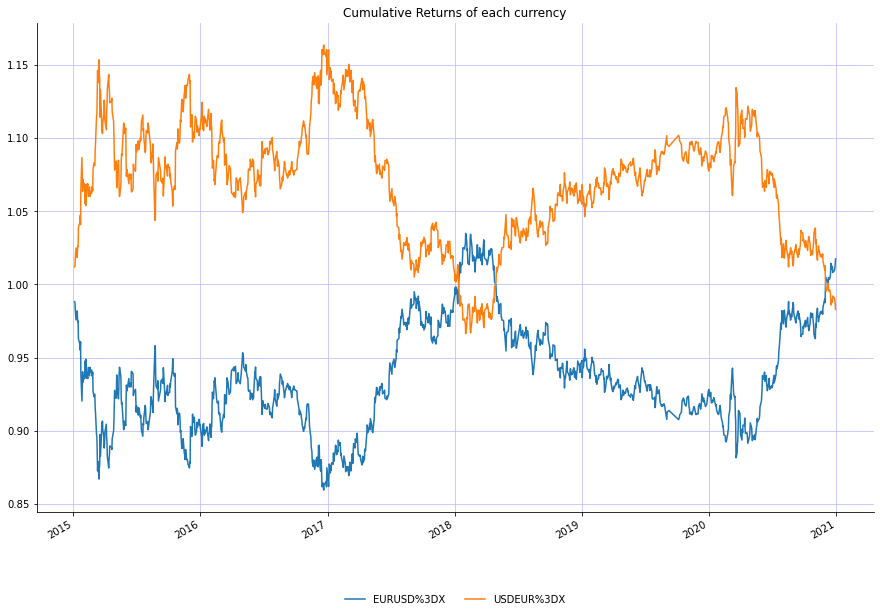

In [57]:
returns = data_df[["EURUSD%3DX","USDEUR%3DX"]] .apply(np.log).diff(1) 
cumulative_returns = returns.cumsum().apply(np.exp)
ax = cumulative_returns.plot(title='Cumulative Returns of each currency', figsize=(15,10));
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=5).get_frame().set_linewidth(0.0);
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlabel('')
ax.grid(c = (0.75, 0.75, 0.99))
plt.show()

## Calculate Descriptive Statistics

In order to calculate the returns for each of these securities we need to consider:

Simple Returns: weighted sum of the simple returns of the securities of the portfolio.

$$r_t = \frac{P_t}{P_0} - 1$$

Log Retruns: The log return for a time period is the sum of the log returns of partitions of the time period.  

$$r_t = ln\left(\frac{P_t}{P_0}\right)$$

For this analysis we considered log returns since the frequency of compounding does not matter, making returns of different assets easier to compare. 

- Log Returns (daily)

In [125]:
returns = data_df.pct_change()
returns

,PFE,AZN,GSK,SAN,NVS,JNJ,BMY,ABBV,IHE,XBI,PJP,GC=F,EURUSD%3DX,USDEUR%3DX
Date,,,,,,,,,,,,,,
2015-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-05,-0.005426,-0.007670,-0.010856,-0.058195,0.002168,-0.006984,-0.015627,-0.018819,-0.006582,0.003132,-0.006454,0.015093,-0.011827,0.011968
2015-01-06,0.008344,-0.024334,-0.005488,-0.018915,-0.008437,-0.004914,-0.001707,-0.004950,-0.005697,-0.024868,-0.005892,0.012792,-0.000621,0.000621
2015-01-07,0.013685,-0.001027,0.010316,0.015424,0.004364,0.022076,0.012996,0.040416,0.021587,0.039989,0.023100,-0.007135,-0.005332,0.005361
2015-01-08,0.020408,0.014393,0.025647,-0.069620,0.034756,0.007863,0.024983,0.010459,0.017675,0.022174,0.021242,-0.001817,-0.003314,0.003325
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-23,0.019053,0.000821,0.003879,0.036184,0.002268,-0.005107,-0.007000,0.004669,0.002780,0.000066,0.007743,0.004339,-0.004107,0.004124
2020-12-28,-0.016560,0.012508,0.001656,-0.003175,0.031908,0.008227,0.001967,0.001646,0.000057,-0.030965,0.001423,0.001334,0.001513,-0.001511
2020-12-29,0.006247,0.010531,0.019013,-0.006369,0.023575,0.006201,0.004908,0.012083,0.001867,-0.029291,0.001847,0.001332,0.001503,-0.001501


- Log Returns (year)

In [126]:
returns_year = data_df.resample('Y').ffill().pct_change()
returns_year

,PFE,AZN,GSK,SAN,NVS,JNJ,BMY,ABBV,IHE,XBI,PJP,GC=F,EURUSD%3DX,USDEUR%3DX
Date,,,,,,,,,,,,,,
2015-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-12-31,0.044249,-0.158153,0.020952,0.118476,-0.120432,0.153292,-0.134911,0.097920,-0.117469,-0.154470,-0.192463,0.084599,-0.032805,0.033917
2017-12-31,0.159018,0.332417,-0.029795,0.311432,0.194629,0.244252,0.077089,0.600749,0.106402,0.437725,0.152968,0.135913,0.129209,-0.114425
2018-12-31,0.248189,0.138627,0.137882,-0.285094,0.059453,-0.051315,-0.128957,-0.009565,-0.077647,-0.152771,-0.017771,-0.021435,-0.042019,0.043862
2019-12-31,-0.069079,0.356793,0.292388,-0.023125,0.271340,0.162200,0.277381,0.014682,0.154724,0.325623,0.046449,0.188688,-0.020774,0.021214
2020-12-31,0.030695,0.031216,-0.177169,-0.263285,0.033443,0.108237,0.004094,0.277183,0.136611,0.483316,0.113023,0.245870,0.097980,-0.089236


- Plotting the log returns evolution according to each thicker (daily)

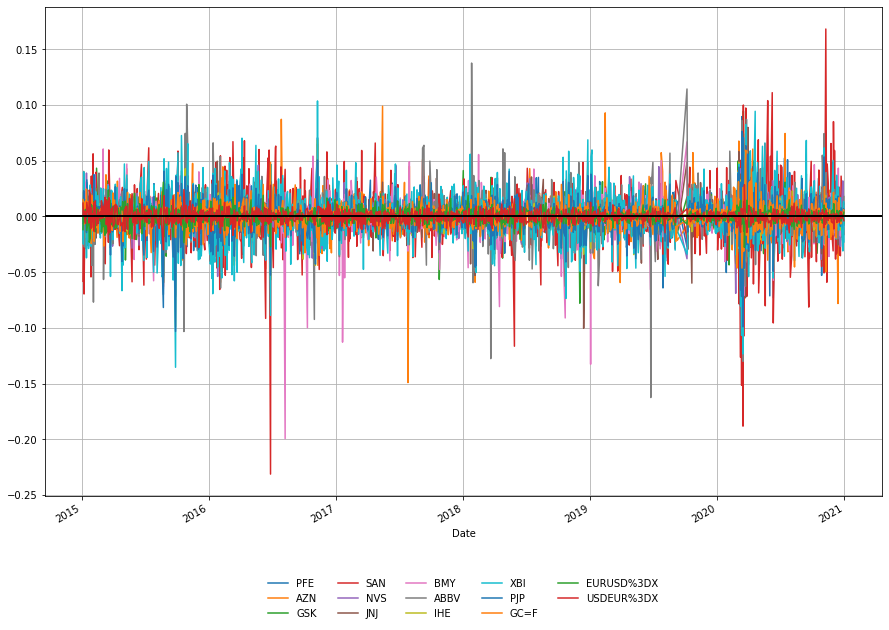

In [127]:
returns.plot(grid = True, figsize = (15,10)).axhline(y = 0, color = "black", lw = 2)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=5).get_frame().set_linewidth(0.0)
plt.show()

- Annual Percentage Rate

Annual rate of interest charged to borrowers and paid to investors

In [128]:
APR = returns.groupby([returns.index.year]).agg('sum')
APR_avg = APR.mean()

In [129]:
pd.DataFrame(APR_avg, columns = ['Average APR']).T

,PFE,AZN,GSK,SAN,NVS,JNJ,BMY,ABBV,IHE,XBI,PJP,GC=F,EURUSD%3DX,USDEUR%3DX
Average APR,0.09678,0.129145,0.052053,-0.054686,0.076042,0.114129,0.071141,0.16869,0.063899,0.193399,0.051791,0.088448,0.006317,0.000563


- Annual Percentage Yield

In [130]:
N_days = np.array(tr_days.T)
N_total = np.sum(N_days)
APY = (1  + APR / N_days )**N_days - 1
APY_avg = (1  + APR_avg /N_total  )**N_total - 1

In [131]:
APY

,PFE,AZN,GSK,SAN,NVS,JNJ,BMY,ABBV,IHE,XBI,PJP,GC=F,EURUSD%3DX,USDEUR%3DX
Date,,,,,,,,,,,,,,
2015,0.088942,0.030576,0.028201,-0.352084,-0.022363,0.026019,0.218334,-0.022492,0.116036,0.204164,0.145212,-0.096600,-0.088883,0.113853
2016,0.062810,-0.132007,0.038999,0.248100,-0.103620,0.163416,-0.089213,0.142164,-0.092334,-0.086489,-0.172128,0.099192,-0.029381,0.037578
2017,0.165984,0.375014,-0.021328,0.345884,0.205877,0.252897,0.105882,0.627699,0.115505,0.473565,0.164624,0.142108,0.132392,-0.111935
2018,0.270590,0.159014,0.159774,-0.256254,0.076906,-0.029156,-0.099053,0.053352,-0.061234,-0.111377,0.001461,-0.016102,-0.039373,0.046747
2019,-0.052779,0.388339,0.303664,0.003799,0.285857,0.178007,0.320222,0.060331,0.166888,0.370091,0.059211,0.195960,-0.019493,0.022549
2020,0.100425,0.096467,-0.135526,-0.113678,0.078420,0.159507,0.049829,0.355433,0.185303,0.616736,0.164903,0.273879,0.101108,-0.086638


In [132]:
pd.DataFrame(APY_avg, columns = ['Average APY']).T

,PFE,AZN,GSK,SAN,NVS,JNJ,BMY,ABBV,IHE,XBI,PJP,GC=F,EURUSD%3DX,USDEUR%3DX
Average APY,0.101617,0.137854,0.053432,-0.053218,0.079008,0.120897,0.073733,0.183752,0.065984,0.213365,0.053156,0.092477,0.006337,0.000563


- Measuring the volatility

Variance $\sigma^2$$$Var(R) = \sigma^2 = \frac{\sum_{t = 1}^{N}(R_t - \bar{R_t})^2}{N}$$
Standard Deviation $\sigma$$$\sigma =\sqrt{\sigma^2} = \sqrt{\frac{\sum_{t = 1}^{N}(R_t - \bar{R_t})^2}{N}}$$where $R_t = $ log price of instrument $i$ at the time $t$

In [133]:
STD = returns.groupby([returns.index.year]).agg('std') * np.sqrt(N) ## per year
STD_avg = STD.mean()

In [134]:
VAR = STD **0.5
VAR_avg = VAR.mean()

In [135]:
VAR

,PFE,AZN,GSK,SAN,NVS,JNJ,BMY,ABBV,IHE,XBI,PJP,GC=F,EURUSD%3DX,USDEUR%3DX
Date,,,,,,,,,,,,,,
2015,0.230497,0.237577,0.228631,0.279069,0.221679,0.204356,0.246589,0.283205,0.244904,0.304211,0.253397,0.190336,0.174513,0.174495
2016,0.218615,0.250366,0.217672,0.340594,0.221825,0.182999,0.280408,0.266635,0.244995,0.315534,0.237401,0.203743,0.145935,0.145948
2017,0.166822,0.250621,0.182753,0.240821,0.186556,0.172566,0.240438,0.214772,0.180454,0.237217,0.189980,0.162739,0.137908,0.137698
2018,0.218648,0.218784,0.222356,0.265973,0.214502,0.232728,0.256075,0.298774,0.218325,0.280212,0.223723,0.162957,0.137447,0.137515
2019,0.220990,0.237776,0.185566,0.247598,0.198737,0.207538,0.258222,0.277532,0.194952,0.259700,0.202301,0.170270,0.116003,0.115978
2020,0.301559,0.296261,0.280259,0.389384,0.270083,0.275083,0.273675,0.293697,0.269461,0.322089,0.275077,0.229911,0.137379,0.137526


In [136]:
STD

,PFE,AZN,GSK,SAN,NVS,JNJ,BMY,ABBV,IHE,XBI,PJP,GC=F,EURUSD%3DX,USDEUR%3DX
Date,,,,,,,,,,,,,,
2015,0.053129,0.056443,0.052272,0.077880,0.049142,0.041761,0.060806,0.080205,0.059978,0.092544,0.064210,0.036228,0.030455,0.030449
2016,0.047793,0.062683,0.047381,0.116004,0.049206,0.033489,0.078629,0.071094,0.060023,0.099562,0.056359,0.041511,0.021297,0.021301
2017,0.027830,0.062811,0.033399,0.057995,0.034803,0.029779,0.057810,0.046127,0.032563,0.056272,0.036092,0.026484,0.019019,0.018961
2018,0.047807,0.047866,0.049442,0.070741,0.046011,0.054162,0.065574,0.089266,0.047666,0.078519,0.050052,0.026555,0.018892,0.018910
2019,0.048837,0.056537,0.034435,0.061305,0.039497,0.043072,0.066679,0.077024,0.038006,0.067444,0.040926,0.028992,0.013457,0.013451
2020,0.090938,0.087771,0.078545,0.151620,0.072945,0.075671,0.074898,0.086258,0.072609,0.103741,0.075668,0.052859,0.018873,0.018913


In [137]:
pd.DataFrame(STD_avg, columns = ['Average STD']).T #### Average Volatility

,PFE,AZN,GSK,SAN,NVS,JNJ,BMY,ABBV,IHE,XBI,PJP,GC=F,EURUSD%3DX,USDEUR%3DX
Average STD,0.052722,0.062352,0.049246,0.089257,0.048601,0.046322,0.067399,0.074996,0.051808,0.083014,0.053884,0.035438,0.020332,0.020331


- Covariance Matrix

In [138]:
cov_matrix = returns.pct_change().apply(lambda x: np.log(1+x)).cov()
cov_matrix

C:\Users\raimu\anaconda3\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\raimu\anaconda3\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,PFE,AZN,GSK,SAN,NVS,JNJ,BMY,ABBV,IHE,XBI,PJP,GC=F,EURUSD%3DX,USDEUR%3DX
PFE,1.992738,0.411649,0.473553,0.167492,0.481591,0.438509,0.349422,0.152831,0.472682,0.065907,0.451211,-0.028457,0.164854,0.164736
AZN,0.411649,2.435438,0.620691,0.138830,0.471333,0.130721,0.393908,0.354004,0.488647,0.443156,0.471085,-0.155033,-0.153745,-0.153841
GSK,0.473553,0.620691,2.143274,0.264301,0.567507,0.472920,0.404561,0.371149,0.441292,0.386054,0.500720,0.344713,0.121839,0.121796
SAN,0.167492,0.138830,0.264301,1.522038,0.031320,0.337835,0.297200,0.216824,0.313697,0.399916,0.385976,0.110537,0.054778,0.054923
NVS,0.481591,0.471333,0.567507,0.031320,2.623893,0.515355,0.223642,0.197609,0.424216,0.281313,0.428787,0.073785,-0.008599,-0.008685
JNJ,0.438509,0.130721,0.472920,0.337835,0.515355,2.263540,0.250102,0.560276,0.471204,0.163163,0.363503,0.004176,0.159235,0.159362
BMY,0.349422,0.393908,0.404561,0.297200,0.223642,0.250102,2.208589,0.608196,0.607417,0.272636,0.754117,0.100263,-0.050863,-0.050693
ABBV,0.152831,0.354004,0.371149,0.216824,0.197609,0.560276,0.608196,2.548305,0.784383,0.369966,0.673770,-0.143107,-0.276742,-0.276927
IHE,0.472682,0.488647,0.441292,0.313697,0.424216,0.471204,0.607417,0.784383,2.496671,0.875634,1.351112,-0.081177,-0.053223,-0.052792
XBI,0.065907,0.443156,0.386054,0.399916,0.281313,0.163163,0.272636,0.369966,0.875634,2.565193,0.922129,-0.078789,-0.090649,-0.090674


In [139]:
Correlation = returns.corr().style.background_gradient(cmap='Blues')
Correlation

,PFE,AZN,GSK,SAN,NVS,JNJ,BMY,ABBV,IHE,XBI,PJP,GC=F,EURUSD%3DX,USDEUR%3DX
PFE,1.000000,0.413365,0.515777,0.361302,0.537758,0.582300,0.465932,0.480988,0.695776,0.495702,0.672049,-0.024367,0.007203,-0.008527
AZN,0.413365,1.000000,0.618982,0.280508,0.583467,0.431196,0.394021,0.363779,0.546880,0.455657,0.545567,0.052397,0.042348,-0.042949
GSK,0.515777,0.618982,1.000000,0.428180,0.630574,0.525668,0.432753,0.426557,0.614769,0.438106,0.604916,0.089667,0.061029,-0.062109
SAN,0.361302,0.280508,0.428180,1.000000,0.407516,0.326525,0.276190,0.303603,0.454437,0.371692,0.463729,-0.057672,0.128097,-0.129387
NVS,0.537758,0.583467,0.630574,0.407516,1.000000,0.511889,0.404534,0.422752,0.638670,0.526827,0.635728,0.065631,0.054256,-0.055489
JNJ,0.582300,0.431196,0.525668,0.326525,0.511889,1.000000,0.465725,0.442437,0.631072,0.375017,0.590580,0.028414,0.023280,-0.024120
BMY,0.465932,0.394021,0.432753,0.276190,0.404534,0.465725,1.000000,0.452569,0.622427,0.475483,0.610359,0.000794,0.006266,-0.007170
ABBV,0.480988,0.363779,0.426557,0.303603,0.422752,0.442437,0.452569,1.000000,0.595955,0.516497,0.625192,-0.056262,0.013782,-0.014914
IHE,0.695776,0.546880,0.614769,0.454437,0.638670,0.631072,0.622427,0.595955,1.000000,0.822883,0.940938,-0.013725,-0.002192,0.001040
XBI,0.495702,0.455657,0.438106,0.371692,0.526827,0.375017,0.475483,0.516497,0.822883,1.000000,0.820338,-0.020110,-0.015050,0.014282


- Plotting a scatterplot with the risk / return relationship for each asset

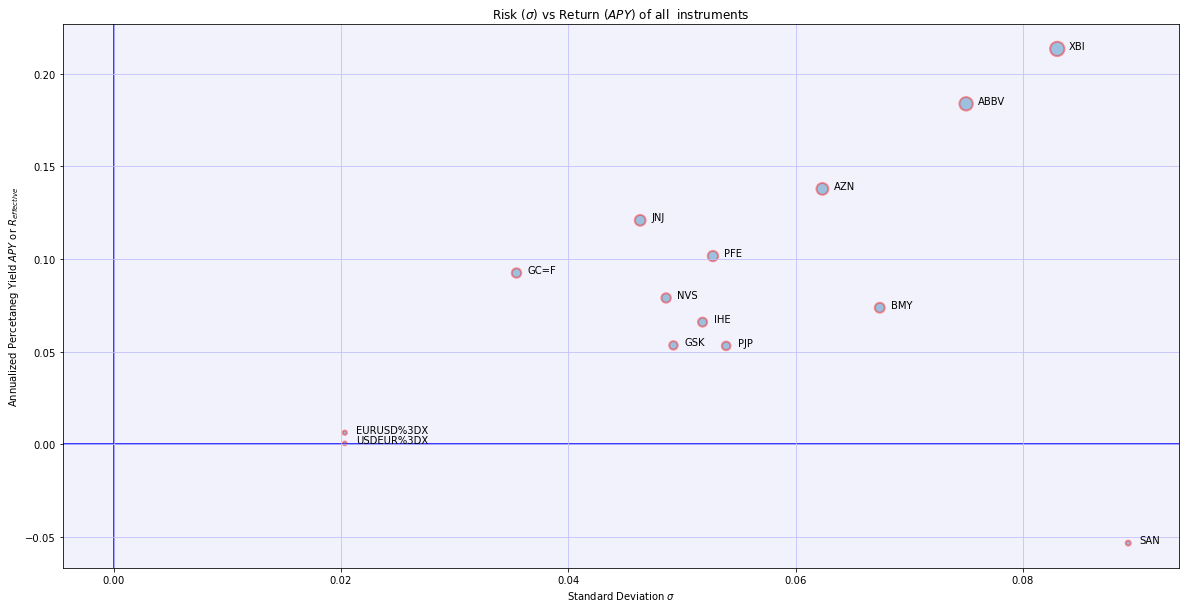

In [140]:
# configuration - generate different colors & sizes

c = [y + x for y, x in zip(APY_avg, STD_avg)]
s = list(map(lambda x : x * 700, c)) ## size


fig, ax = plt.subplots(figsize = (20,10))

ax.set_title(r"Risk ($\sigma$) vs Return ($APY$) of all  instruments")

ax.set_facecolor((0.95, 0.95, 0.99))

ax.grid(c = (0.75, 0.75, 0.99))

ax.set_xlabel(r"Standard Deviation $\sigma$")

ax.set_ylabel(r"Annualized Percetaneg Yield $APY$ or $R_{effective}$")

ax.scatter(STD_avg, APY_avg, s = s ,  cmap = "Reds", alpha = 0.4, edgecolors="Red", linewidth=2)

ax.axhline(y = 0.0,xmin = 0 ,xmax = 5,c = "blue",linewidth = 1.5,zorder = 0)

ax.axvline(x = 0.0,ymin = 0 ,ymax = 40,c = "blue",linewidth = 1.5,zorder = 0)

for idx, instr in enumerate(list(STD.columns)):
    ax.annotate(instr, (STD_avg[idx]+0.001, APY_avg[idx]))

#### Portfolio Optimization

- Creating random portfolios

In [141]:
number_of_portfolios = 2000
RF = 0

portfolio_returns = []
portfolio_risk = []
sharpe_ratio_port = []
portfolio_weights = []

for portfolio in range (number_of_portfolios):
    weights = np.random.random_sample((len(instruments)))
    weights = weights / np.sum(weights) #line ensures that the sum of our weights is 1

AttributeError: 'numpy.ndarray' object has no attribute 'append'

In [144]:
portfolio_risk = np.array(portfolio_risk)
portfolio_returns = np.array(portfolio_returns)
sharpe_ratio_port = np.array(sharpe_ratio_port)

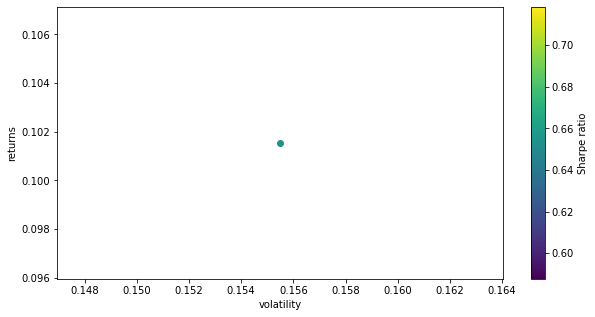

In [146]:
plt.figure(figsize=(10, 5))
plt.scatter(portfolio_risk, portfolio_returns, c=portfolio_returns / portfolio_risk) 
plt.xlabel('volatility')
plt.ylabel('returns')
plt.colorbar(label='Sharpe ratio')

In [153]:
returns.mean()

PFE           0.000446
AZN           0.000595
GSK           0.000240
SAN          -0.000252
NVS           0.000350
JNJ           0.000526
BMY           0.000328
ABBV          0.000777
IHE           0.000294
XBI           0.000891
PJP           0.000239
GC=F          0.000408
EURUSD%3DX    0.000029
USDEUR%3DX    0.000003
dtype: float64

array([0.00983207, 0.02929962, 0.11751699, 0.0085465 , 0.06249363,
       0.03719586, 0.07551008, 0.13968779, 0.08904608, 0.11646314,
       0.04318433, 0.08807162, 0.13471026, 0.04844203])

### Capital Asset Pricing Model (CAPM)

In [ ]:
return_stocks = portfolio.pct_change()

- Risk Free rate (Rf): We considered Treasury bill

In [36]:
risk_free = web.DataReader('^IRX', data_source = 'yahoo', start = start, end = end)['Adj Close']
risk_free = float(risk_free.tail(1))
print("Risk-Free rate (Daily T-bill) = {}".format(risk_free))

Risk-Free rate (Daily T-bill) = 0.06499999761581421


- Market Rm: Assuming SP 500 as our benchmark

    - Adding SP 500 information to our dataframe

In [38]:
market = web.DataReader('^GSPC', data_source = 'yahoo', start = start, end = end)['Adj Close']

market = market.rename("^GSPC") ### Replace Adj Close collum name

market_returns = market.pct_change()

returns_total = pd.concat([returns,market_returns], axis = 1).dropna()

- Calculating the R^2 of each security

In [39]:
corr = returns.corrwith(market_returns)
r_squared = corr ** 2
pd.DataFrame(r_squared, columns = ["R squared"]).T

,PFE,AZN,GSK,SAN,NVS,JNJ,BMY,ABBV,IHE,XBI,PJP,GC=F,EURUSD%3DX,USDEUR%3DX
R squared,0.329414,0.219091,0.332076,0.320228,0.344955,0.376509,0.221446,0.247106,0.502903,0.356475,0.511873,0.00172,0.000168,0.000194


- Defining Extended CAPM

In [ ]:
def CAPM():
    APR_premium = APR_avg - risk_free
    APR_market_premium = APR_avg_market - risk_free
    beta  = corr *  STD_avg / STD_avg_market
    alpha = APR_premium - beta * APR_market_premium 
    return alpha, beta

In [ ]:
alpha, beta = CAPM()

In [ ]:
pd.DataFrame(alpha,  columns = ["Average α"]).T

In [ ]:
pd.DataFrame(beta,  columns = ["Average β"]).T

In [ ]:
number_of_portfolios = 2000
RF = 0

portfolio_returns = []
portfolio_risk = []
sharpe_ratio_port = []
portfolio_weights = []

for portfolio in range (number_of_portfolios):
  weights = np.random.random_sample((len(stocks)))
  print(type(weights))
  print(weights)
  
  weights = weights / np.sum(weights) #line ensures that the sum of our weights is 1

#outcome
<class 'numpy.ndarray'>
[0.78253875 0.43725429 0.11399585 0.44219616]